In [1]:
#Importing Libraries-->

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and checking the first five rows-->

df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Checking general information of our dataset-->

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Checking the statistical values-->

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
#Checking the null values-->

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Checking the percentage of each category in our target column-->

df['Churn'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

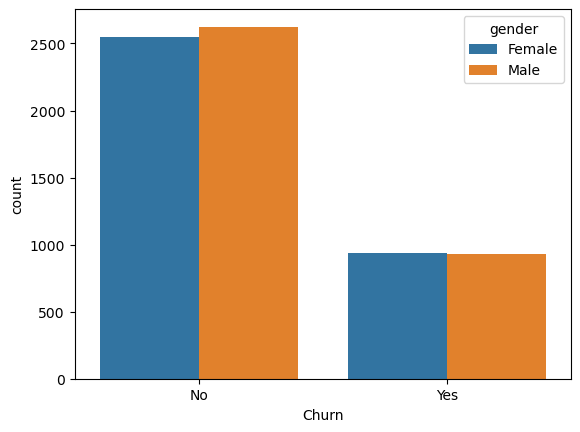

In [7]:
#Plotting a count plot for our target variable by keeping 'gender' on hue parameter-->

sns.countplot(x='Churn', data=df, hue='gender')
plt.show()

# Exploratory Data Analysis-->

In [8]:
#Converting 'TotalCharges' into numeric column-->

df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#Imputing the missing values in 'TotalCharges' with median value-->

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Dropping the irrelevant column 'customerID'-->

df.drop(columns=['customerID'], inplace=True)

In [12]:
#Creating numcol for all numeric dtypes columns-->

numcol=df.select_dtypes(include='number')
numcol.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [13]:
#Creating catcol for all object dtypes columns-->

catcol=df.select_dtypes(include='object')
catcol.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Univariate Analysis-->

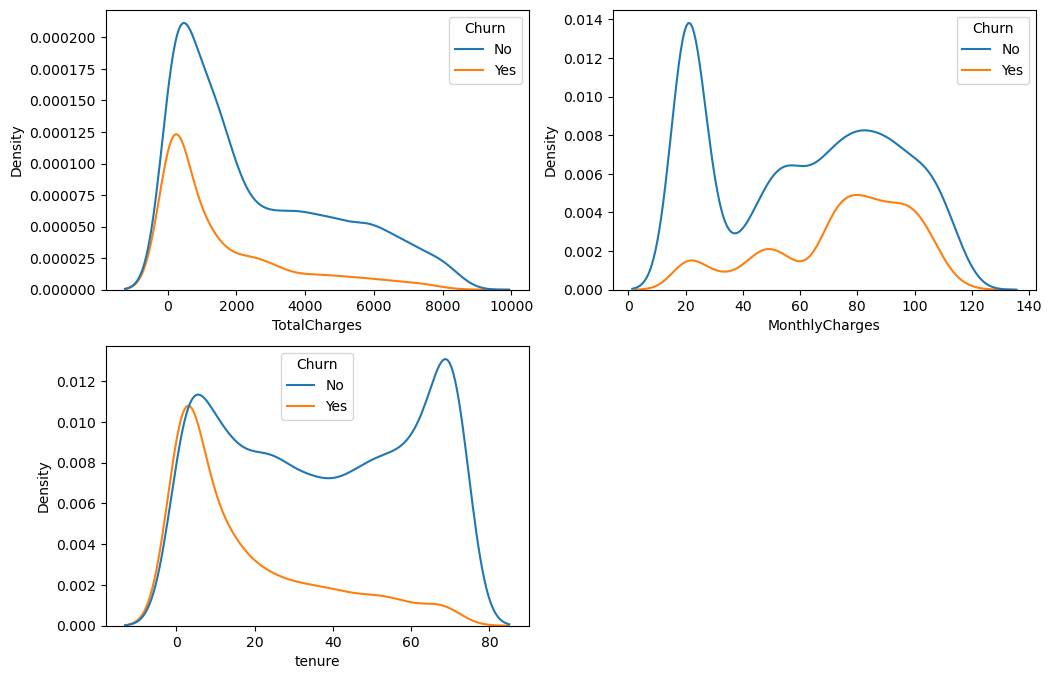

In [14]:
#Creating a frequency plot for 'TotalCharges', 'MonthlyCharges' & 'tenure'-->

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.kdeplot(x='TotalCharges',data=df, color='red', hue='Churn')

plt.subplot(2,2,2)
sns.kdeplot(x='MonthlyCharges', data=df,color='blue', hue='Churn')

plt.subplot(2,2,3)
sns.kdeplot(x='tenure', data=df, color='white', hue='Churn')

plt.show()

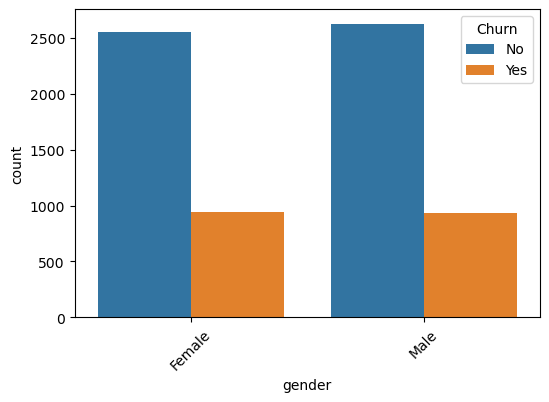

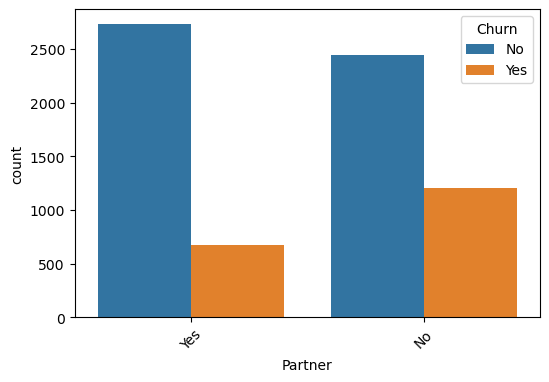

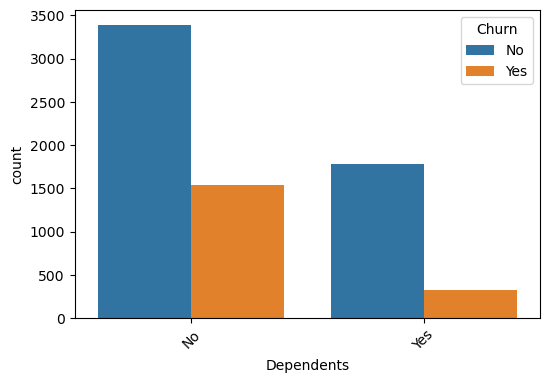

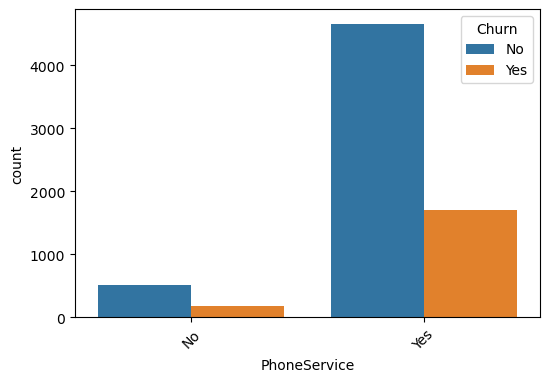

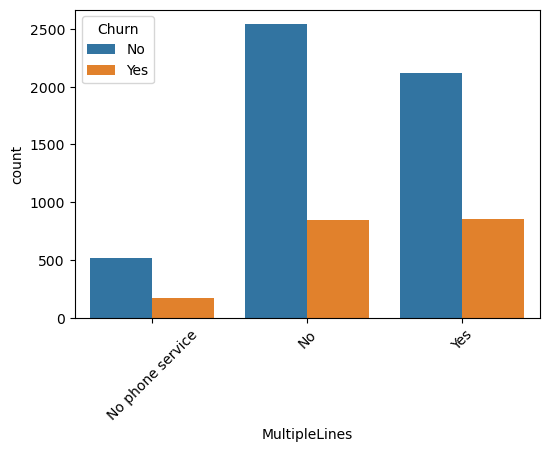

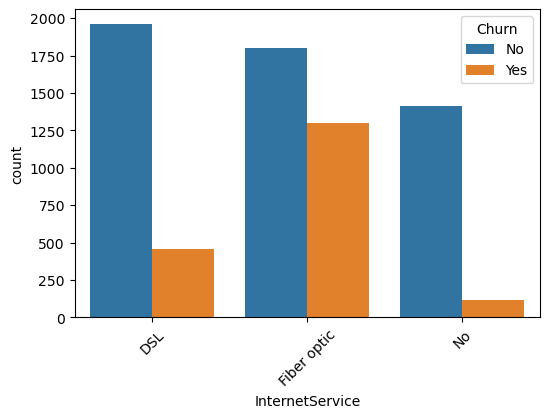

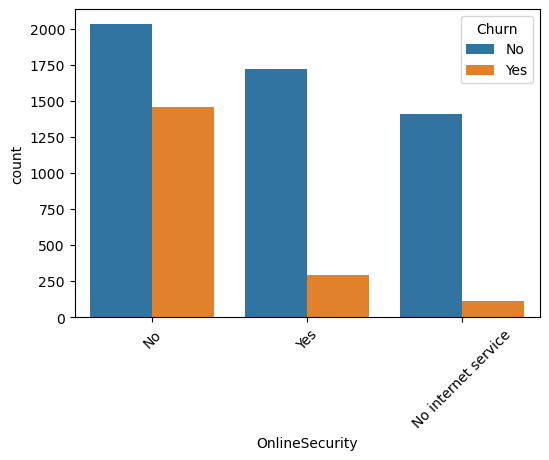

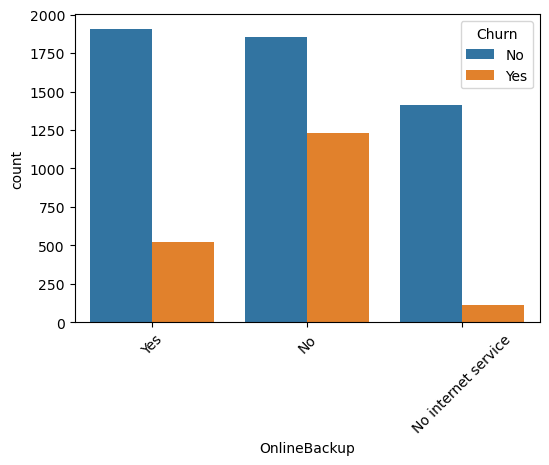

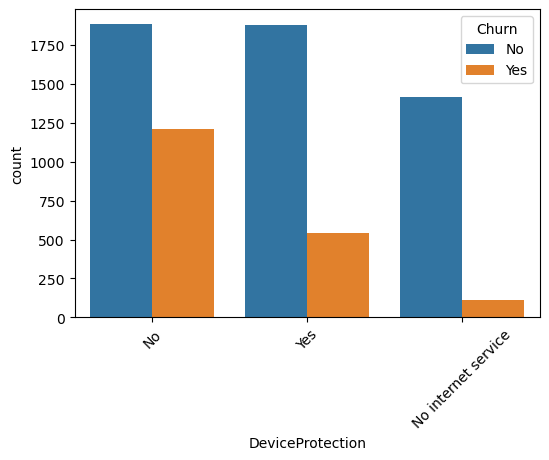

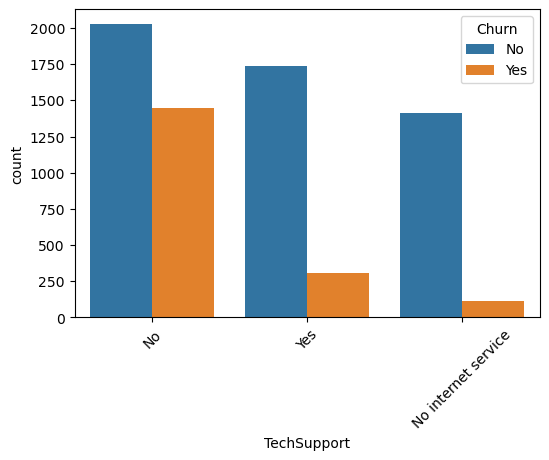

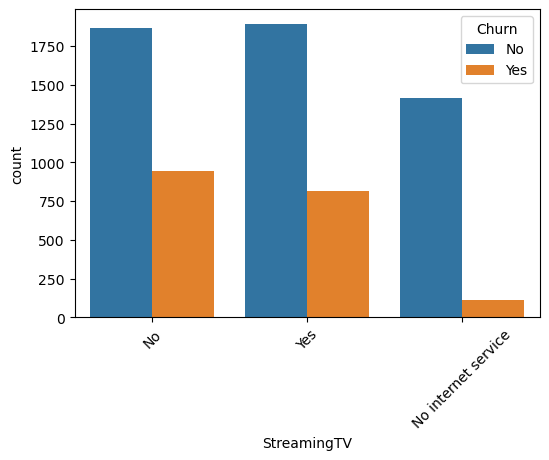

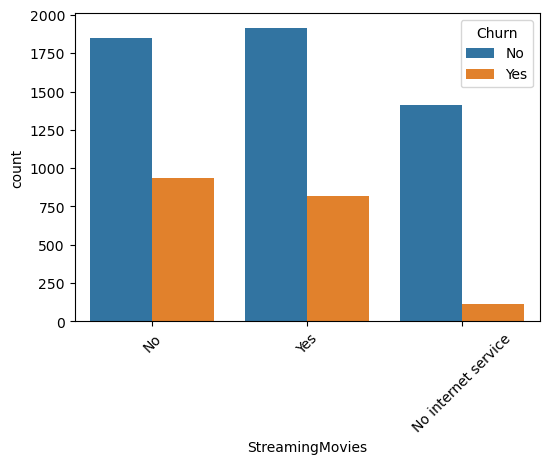

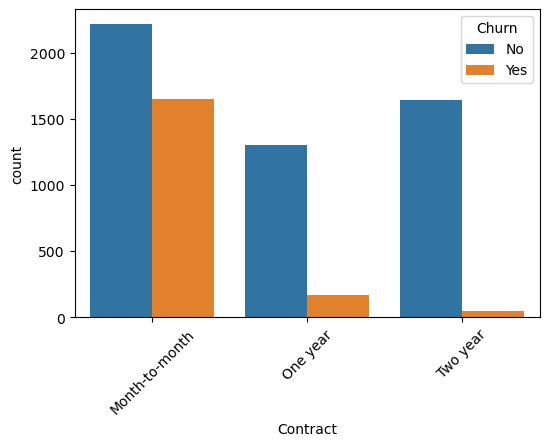

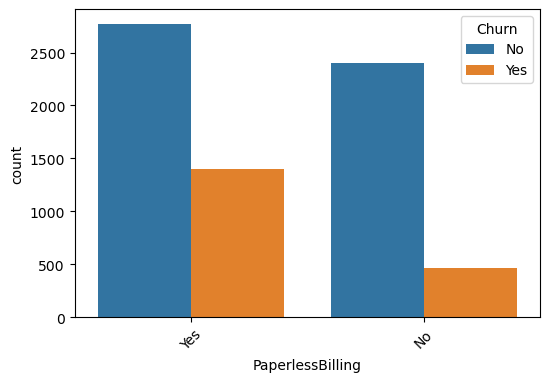

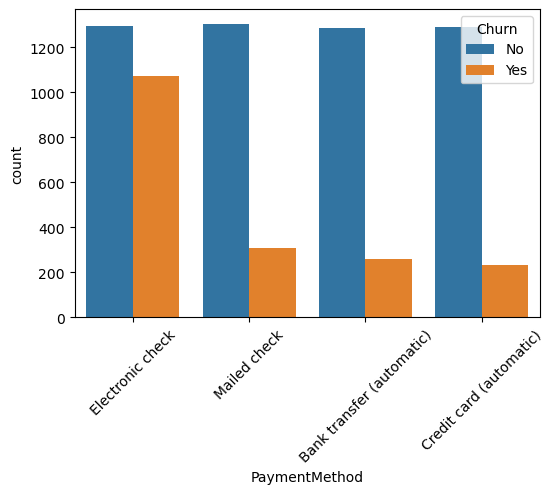

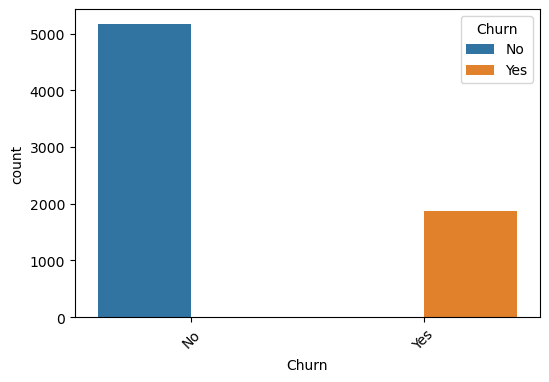

In [15]:
#Creating a countplot for catcol by keeping 'Churn' into hue parameter-->

for i in catcol:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i, data=df, hue='Churn')
    plt.xticks(rotation=45)
    plt.show()

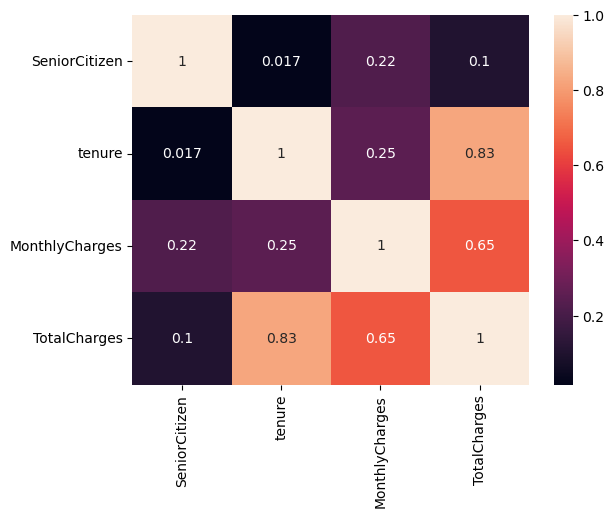

In [16]:
#Plotting a Heatmap to check the correlation of numeric variables-->

sns.heatmap(df.corr(), annot=True)
plt.show()

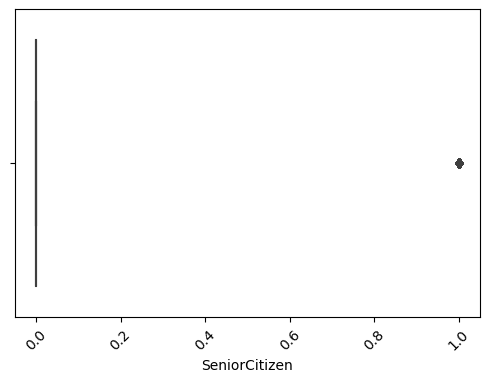

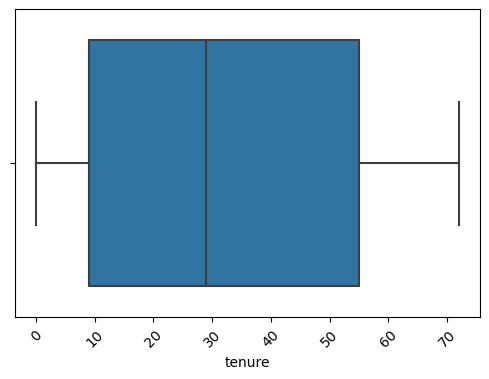

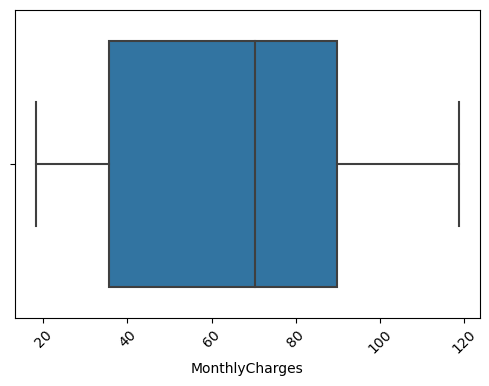

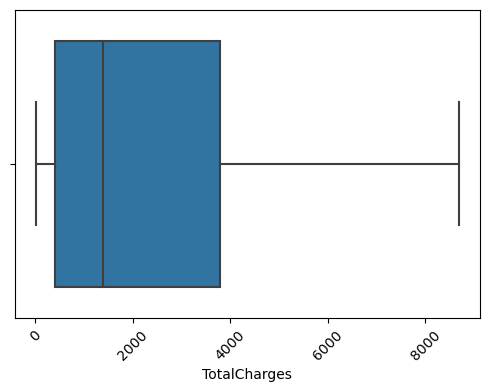

In [17]:
#Creating a Boxplot for numcol-->

for i in numcol:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=i, data=numcol)
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis-->

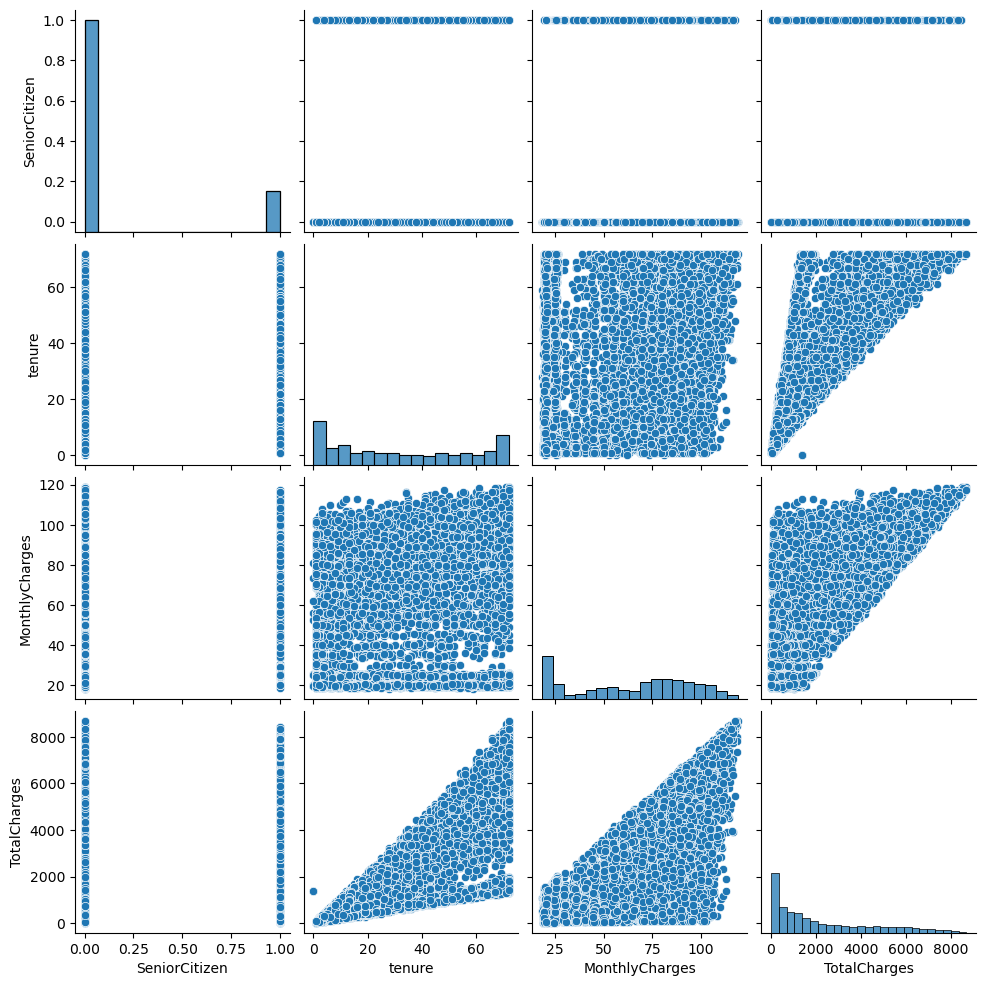

In [18]:
#Creating a pairplot-->

sns.pairplot(df)
plt.show()

# Grouping our data-->

In [19]:
#Using groupby function to group 'churn' with the mean of 'TotalCharges' ,'tenure' & 'MonthlyCharges'-->


df.groupby('Churn')[['TotalCharges','MonthlyCharges','tenure']].agg('mean')

,TotalCharges,MonthlyCharges,tenure
Churn,,,
No,2552.882494,61.265124,37.569965
Yes,1531.796094,74.441332,17.979133


# Encoding-->

In [20]:
#Converting categorical features into numeric features-->

df1=pd.get_dummies(data=df, columns=['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'], drop_first=True)
df1.head(2)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Splitting our dataset into Feature set & DV-->

In [21]:
#Creating Feature set as 'x' & DV as 'y'-->

x=df1.drop(columns='Churn')
y=df1['Churn']

In [22]:
#Importing train_test_split module-->

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25, random_state=111)

# Feature Scaling-->

In [23]:
#Normalizing our Training dataset-->

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Model Fitting-->

## Logistic Regression-

In [24]:
#Logistic Regression Model-->

from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [25]:
#Making predictions-->

logr_pred=logr.predict(x_test)

In [26]:
#Checking the accuracy of our model-->

from sklearn.metrics import confusion_matrix, classification_report
logr_report=classification_report(y_test, logr_pred)
print('classification report->','\n',logr_report)
logr_matrix=confusion_matrix(y_test, logr_pred)
print('confusion matrix->','\n',logr_matrix)

classification report-> 
               precision    recall  f1-score   support

          No       0.87      0.88      0.88      1327
         Yes       0.62      0.59      0.60       434

    accuracy                           0.81      1761
   macro avg       0.75      0.74      0.74      1761
weighted avg       0.81      0.81      0.81      1761

confusion matrix-> 
 [[1173  154]
 [ 179  255]]


In [27]:
#Defining the hyperparameters grid-->

logr_params={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [28]:
#Performing grid search with 10-fold cross-validation-->

from sklearn.model_selection import GridSearchCV
logr_grid=GridSearchCV(logr, logr_params,cv=10, scoring='accuracy')
logr_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [29]:
#Checking the best parameters and best score-->

print(logr_grid.best_params_)
print(logr_grid.best_score_)

{'C': 10}
0.8014034484733917


## Random Forest Classifier-

In [30]:
#Random Forest Classifier-->

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
#Making predictions-->

rfc_pred=rfc.predict(x_test)

In [32]:
#Checking the accuracy of our model-->

rfc_report=classification_report(y_test, rfc_pred)
print('classification report->','\n',rfc_report)
rfc_matrix=confusion_matrix(y_test, rfc_pred)
print('confusion matrix->','\n',rfc_matrix)

classification report-> 
               precision    recall  f1-score   support

          No       0.85      0.88      0.86      1327
         Yes       0.59      0.53      0.56       434

    accuracy                           0.79      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.79      0.79      0.79      1761

confusion matrix-> 
 [[1166  161]
 [ 205  229]]


In [33]:
#Defining the hyperparameters grid-->

rfc_params={'n_estimators': [50, 100, 150, 200],'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [34]:
#Performing grid search with 10-fold cross-validation-->

rfc_grid=GridSearchCV(rfc, rfc_params,cv=10, scoring='accuracy')
rfc_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [35]:
#Checking the best parameters and best score-->

print(rfc_grid.best_params_)
print(rfc_grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
0.802725625823452


In [36]:
#Fitting Random Forest Classifier model with hyperparameter grid-->

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150, min_samples_leaf=4, max_depth=20,min_samples_split=10)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150)

In [37]:
#Making predictions-->

rfc_pred=rfc.predict(x_test)

In [38]:
#Getting the classification_report & confusion_matrix of our model-->

rfc_report=classification_report(y_test, rfc_pred)
print('classification report->','\n',rfc_report)
rfc_matrix=confusion_matrix(y_test, rfc_pred)
print('confusion matrix->','\n',rfc_matrix)

classification report-> 
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1327
         Yes       0.64      0.55      0.59       434

    accuracy                           0.81      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.81      0.81      1761

confusion matrix-> 
 [[1192  135]
 [ 197  237]]


## Support Vector Classifier-

In [39]:
#Importing Support Vector Classifier-->

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [40]:
#Making predictions-->

svc_pred=svc.predict(x_test)

In [41]:
#Getting the classification_report & confusion_matrix-->

svc_report=classification_report(y_test, svc_pred)
print('classification report->','\n',svc_report)
svc_matrix=confusion_matrix(y_test, svc_pred)
print('confusion matrix->','\n',svc_matrix)

classification report-> 
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      1327
         Yes       0.62      0.54      0.58       434

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.80      0.80      0.80      1761

confusion matrix-> 
 [[1184  143]
 [ 201  233]]


In [42]:
#Defining the hyperparameters grid-->

svc_params={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [43]:
#Performing grid search with 10-fold cross-validation-->

from sklearn.model_selection import GridSearchCV
svc_grid=GridSearchCV(svc, svc_params,scoring='accuracy', cv=10)

In [44]:
#Fitting our data-->

svc_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [45]:
#Checking the best parameters and best score-->

print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'kernel': 'rbf'}
0.7943976628286646


In [46]:
#Fitting the SVC model with hyperparameter grid-->

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [47]:
#Making predictions-->

svc_pred=svc.predict(x_test)

In [48]:
#Getting the classification_report & confusion_matrix-->

svc_report=classification_report(y_test, svc_pred)
print('classification report->','\n',svc_report)
svc_matrix=confusion_matrix(y_test, svc_pred)
print('confusion matrix->','\n',svc_matrix)

classification report-> 
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      1327
         Yes       0.62      0.54      0.58       434

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.80      0.80      0.80      1761

confusion matrix-> 
 [[1184  143]
 [ 201  233]]


## KNearestNeighbors Model-

In [49]:
#Importing KNearestNeighbors Model-->

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
#Making predictions-->

knn_pred=rfc.predict(x_test)

In [51]:
#Getting the classification_report & confusion_matrix-->

knn_report=classification_report(y_test, knn_pred)
print('classification report->','\n',knn_report)
knn_matrix=confusion_matrix(y_test, knn_pred)
print('confusion matrix->','\n',knn_matrix)

classification report-> 
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1327
         Yes       0.64      0.55      0.59       434

    accuracy                           0.81      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.81      0.81      1761

confusion matrix-> 
 [[1192  135]
 [ 197  237]]


In [52]:
#Defining the hyperparameters grid-->

knn_params={'n_neighbors': [3, 5, 7, 9],'metric': ['euclidean', 'manhattan']}

In [53]:
#Performing grid search with 10-fold cross-validation-->

svc_grid=GridSearchCV(knn, knn_params,cv=10)

In [54]:
svc_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9]})

In [55]:
#Checking the best parameters and best score-->

print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 9}
0.7714910207939509
